In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

%matplotlib inline

## 1. monthly-sales-of-company-x-jan-6.csv

In [2]:
df = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
series = df['Count']
df.head(2)

,Month,Count
0,1965-01,154
1,1965-02,96


In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if dftest[1] < 0.05:
        print("Ряд стационарен!")
    else:
        print("Ряд нестационарен")

test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Ряд нестационарен


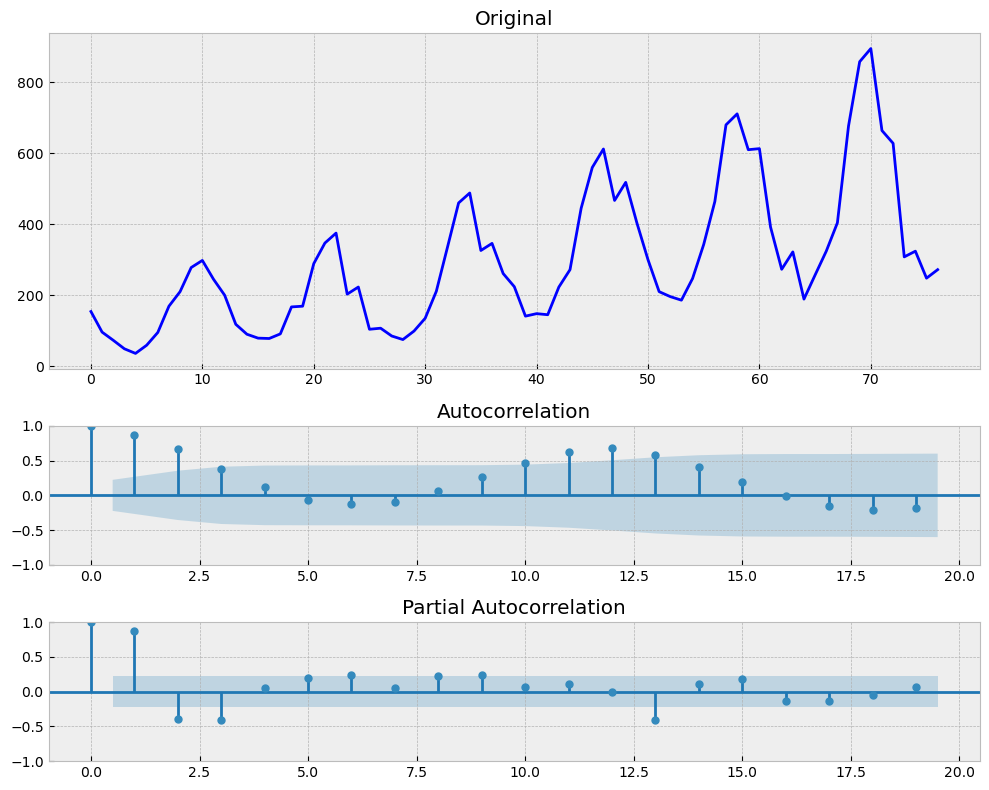

In [4]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Ряд нестационарен


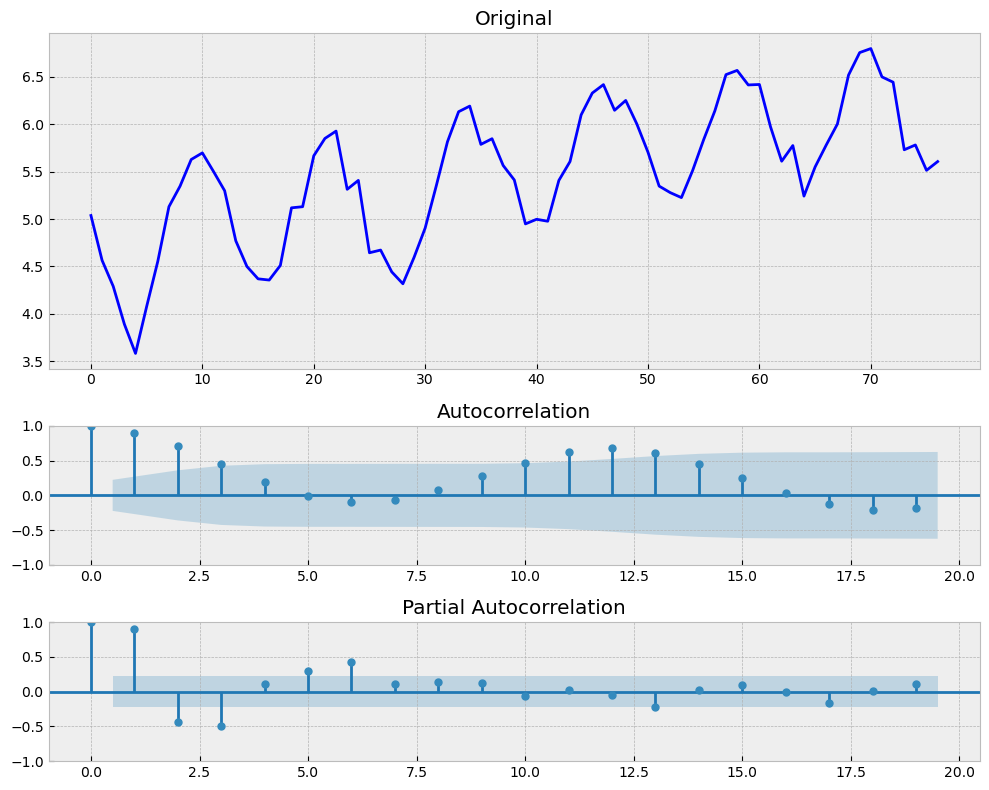

In [5]:
transformed_series = boxcox(series,0)
test_stationarity(transformed_series)
tsplot(transformed_series)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Ряд стационарен!


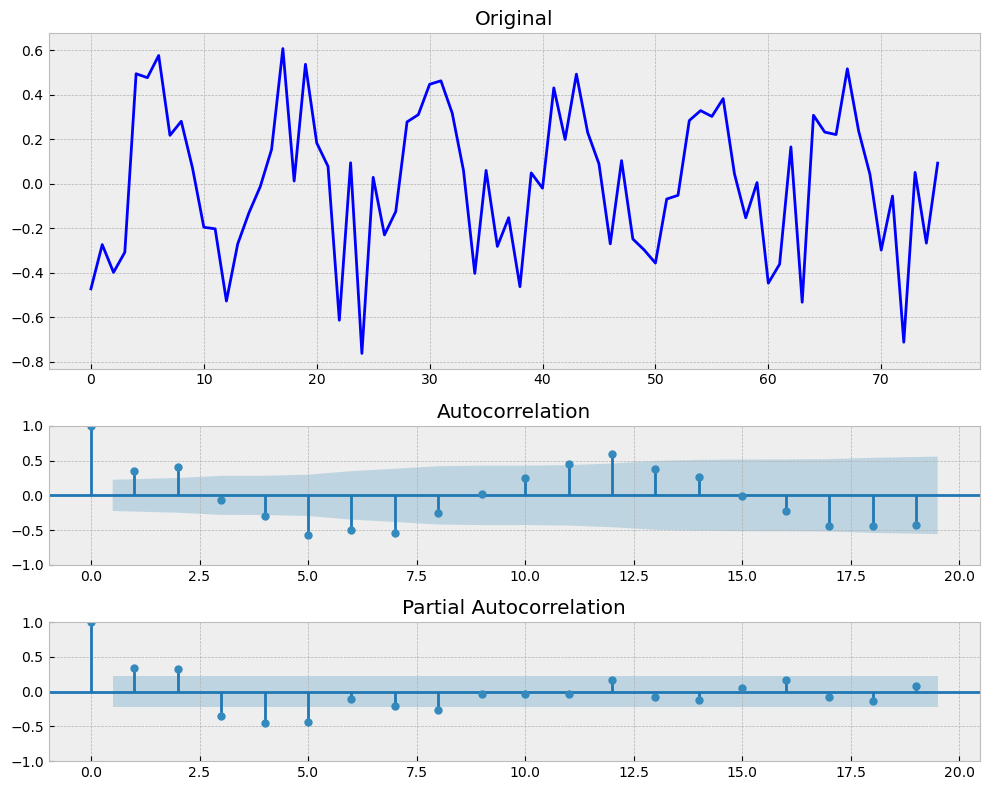

In [6]:
notrend_series = transformed_series[1:] - transformed_series[:-1]
test_stationarity(notrend_series)
tsplot(notrend_series)

## 2.monthly-boston-armed-robberies-j.csv

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64
Ряд нестационарен


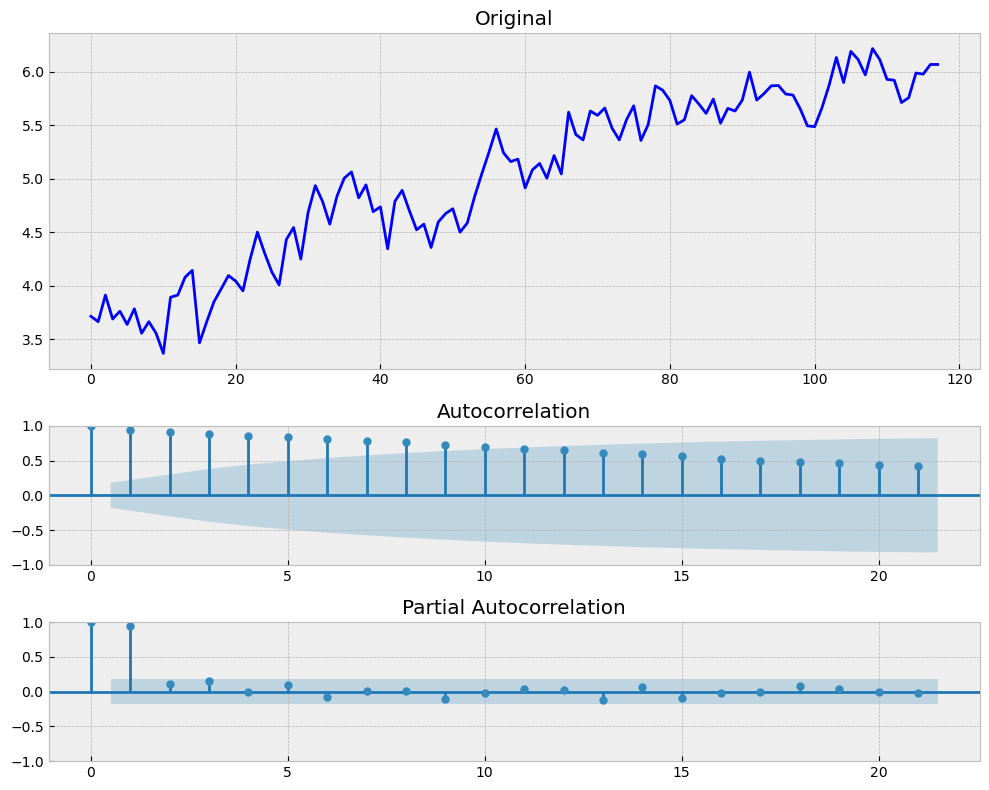

In [7]:
df = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
series = df['Count']

series = boxcox(series,0)
test_stationarity(series)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                  -4.918443
p-value                          0.000032
#Lags Used                       0.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64
Ряд стационарен!


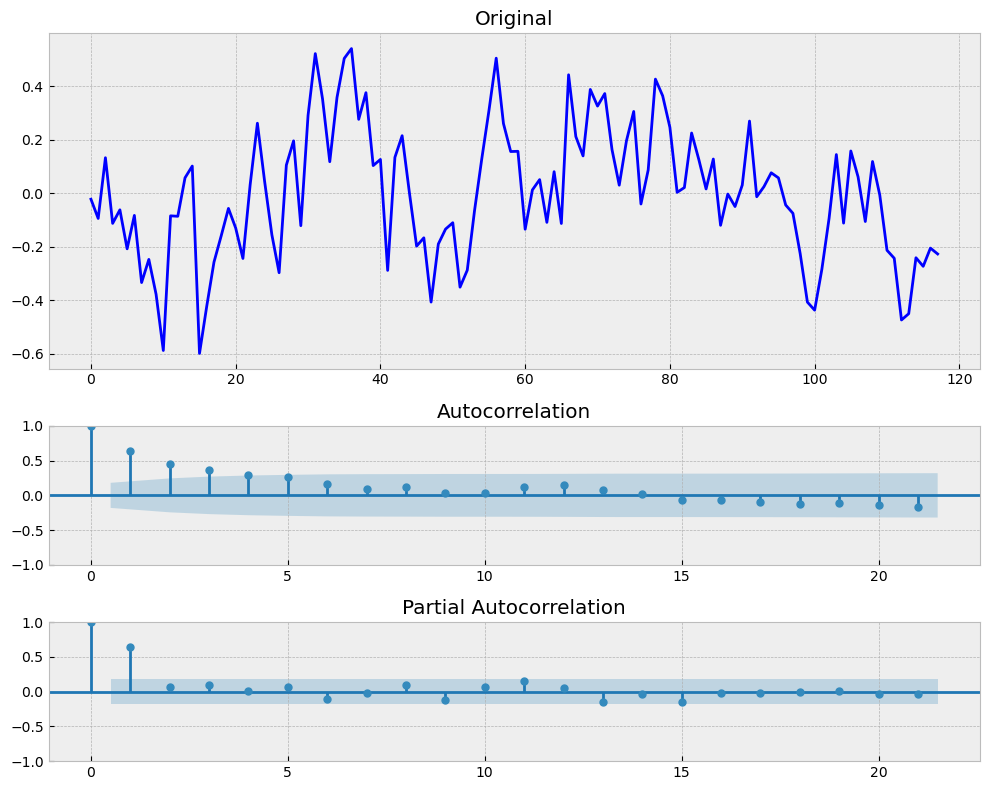

In [8]:
X = np.arange(len(series)).reshape(-1, 1)
y = series.reshape(-1, 1)

model = LinearRegression().fit(X, y)
trend_line = model.predict(X)

# Вычитаем тренд
series = pd.Series( (y - trend_line).flatten() )
test_stationarity(series)
tsplot(series)

## 3.international-airline-passengers.csv

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Ряд нестационарен


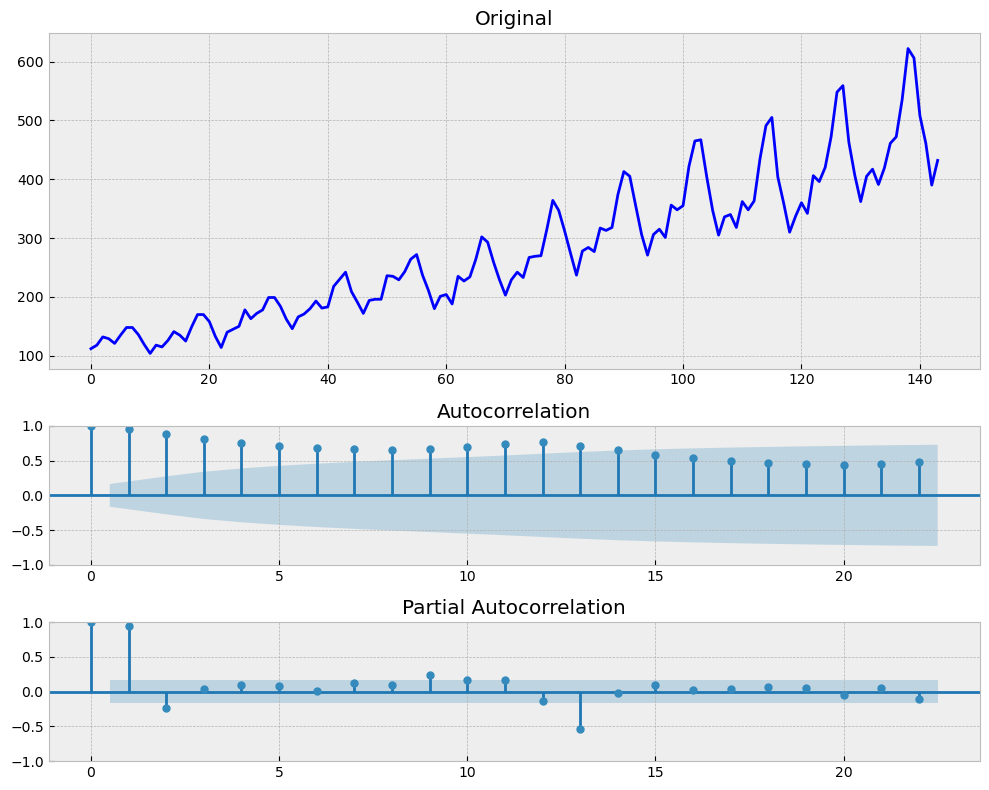

In [9]:
df = pd.read_csv("Series/international-airline-passengers.csv")
series = df['Count'].to_numpy()

test_stationarity(series)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Ряд нестационарен


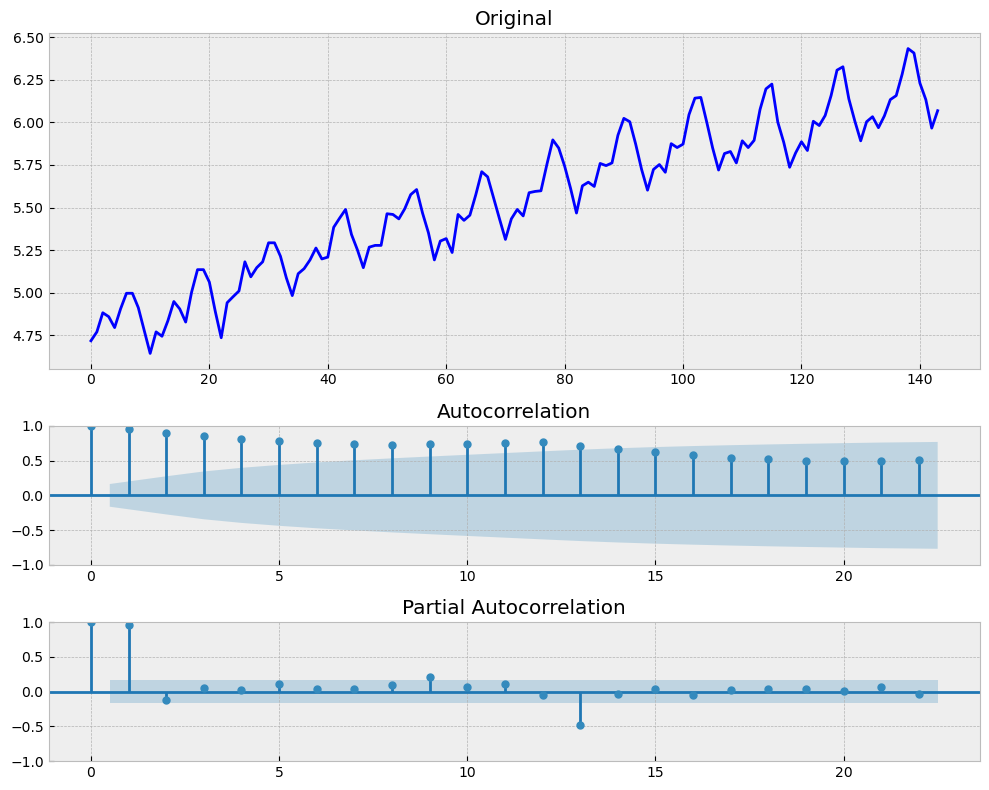

In [10]:
# Преобразование Бокса-Кокса
series = boxcox(series,0)
test_stationarity(series)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.709577
p-value                          0.072396
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64
Ряд нестационарен


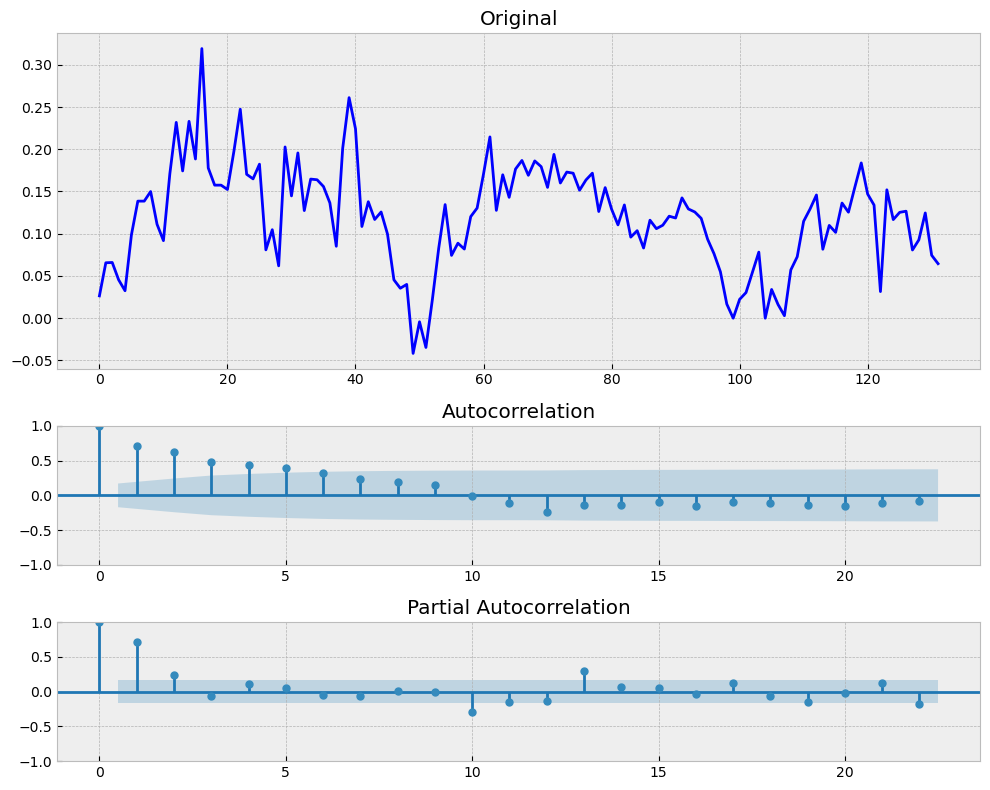

In [11]:
series = series[12:] - series[:-12]
test_stationarity(series)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                  -3.126617
p-value                          0.024645
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64
Ряд стационарен!


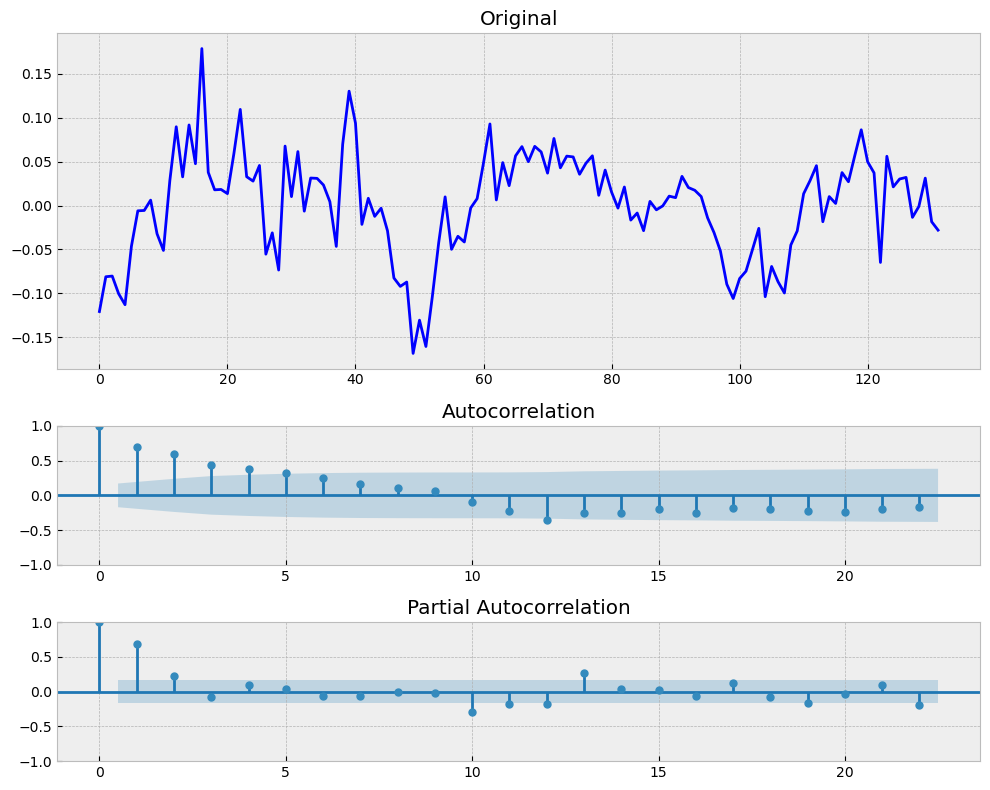

In [12]:
# Убираем линейный тренд
X, y = np.arange(len(series)).reshape(-1, 1) , series.reshape(-1, 1)
model = LinearRegression().fit(X, y)
trend_line = model.predict(X)
series = pd.Series( (y - trend_line).flatten() )

test_stationarity(series)
tsplot(series)

## 4.mean-monthly-air-temperature-deg.csv

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64
Ряд стационарен!


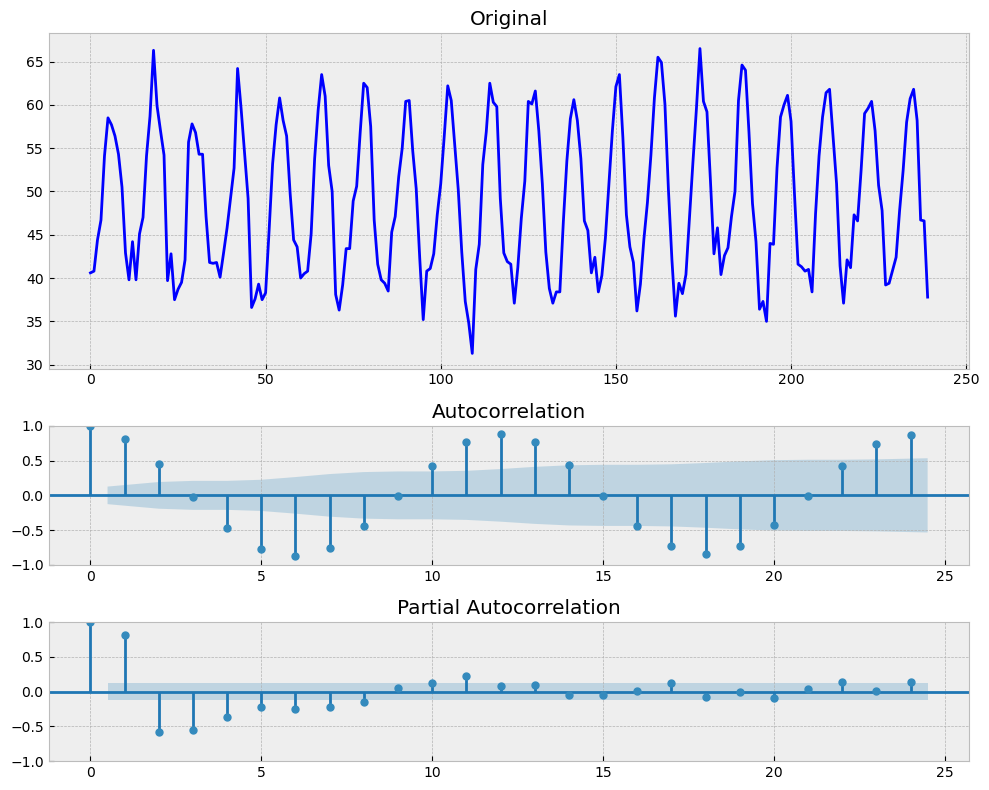

In [13]:
df = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
series = df['Deg']
test_stationarity(series)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                -6.072501e+00
p-value                        1.141945e-07
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64
Ряд стационарен!


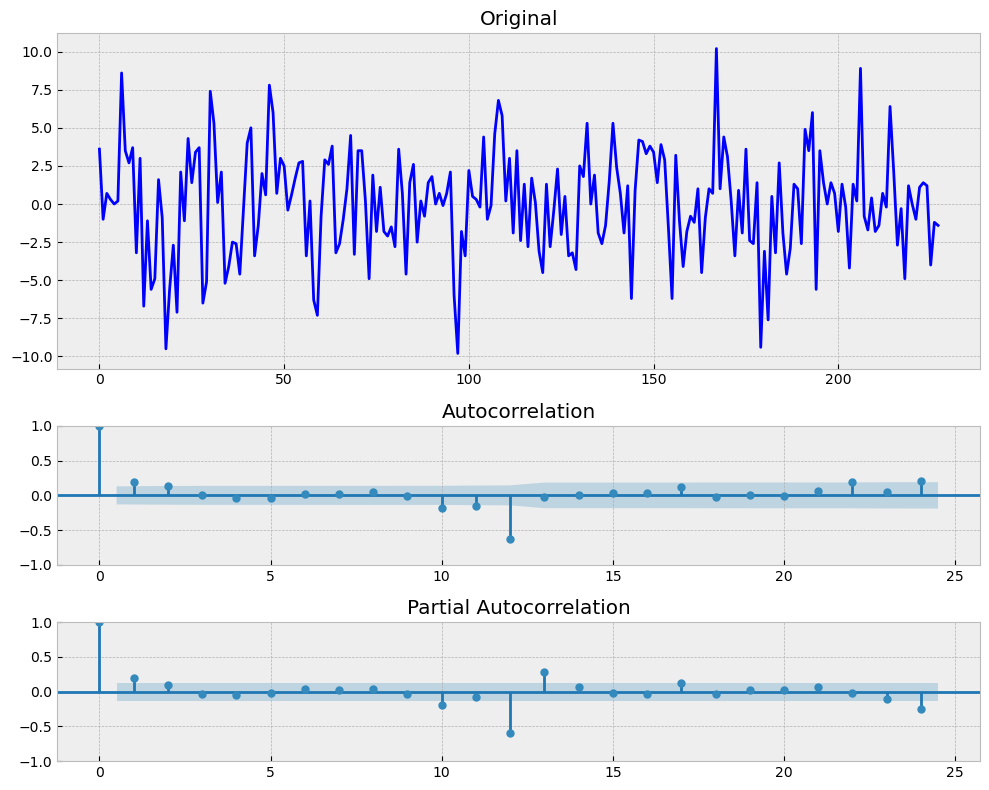

In [14]:
series = series.to_numpy()
series = series[12:] - series[:-12]
test_stationarity(series)
tsplot(series)

## 5.weekly-closings-of-the-dowjones-.csv

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64
Ряд нестационарен


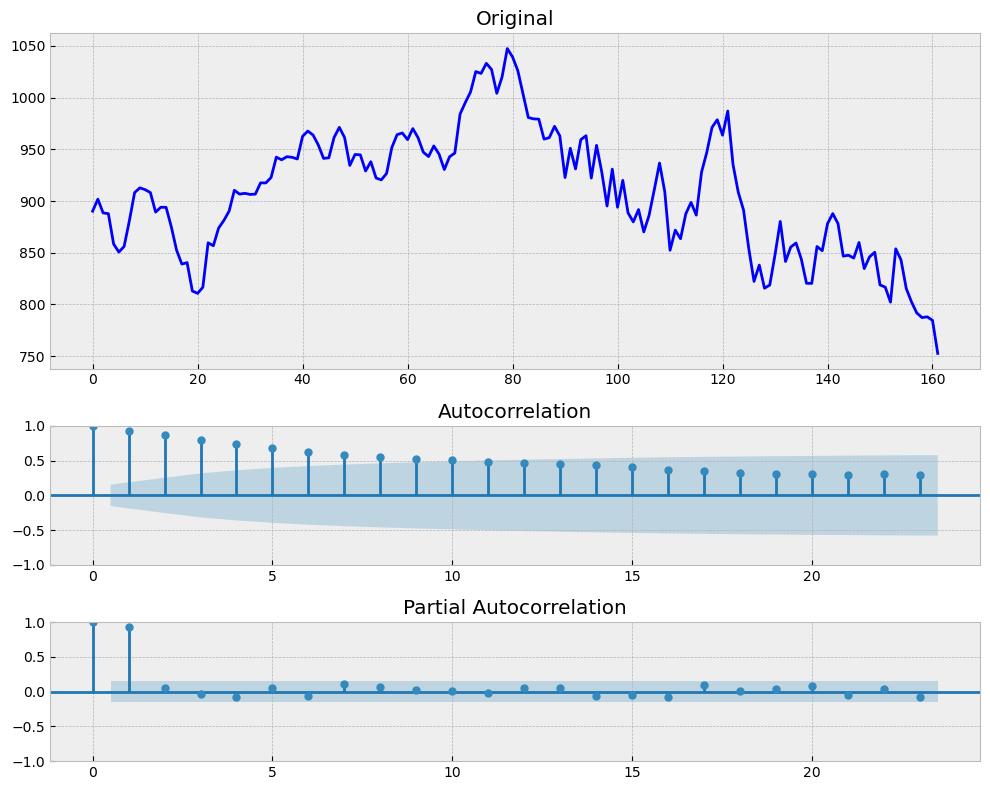

In [15]:
df = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
series = df['Close']
test_stationarity(series)
tsplot(series)

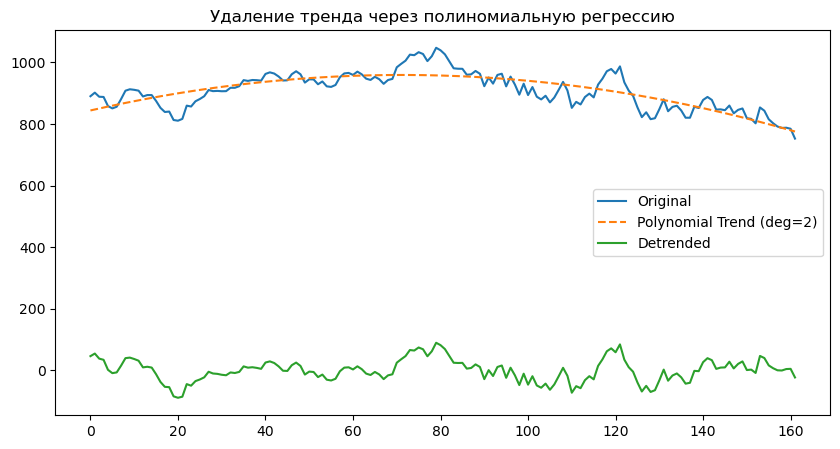

Results of Dickey-Fuller Test:
Test Statistic                  -3.716416
p-value                          0.003888
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64
Ряд стационарен!


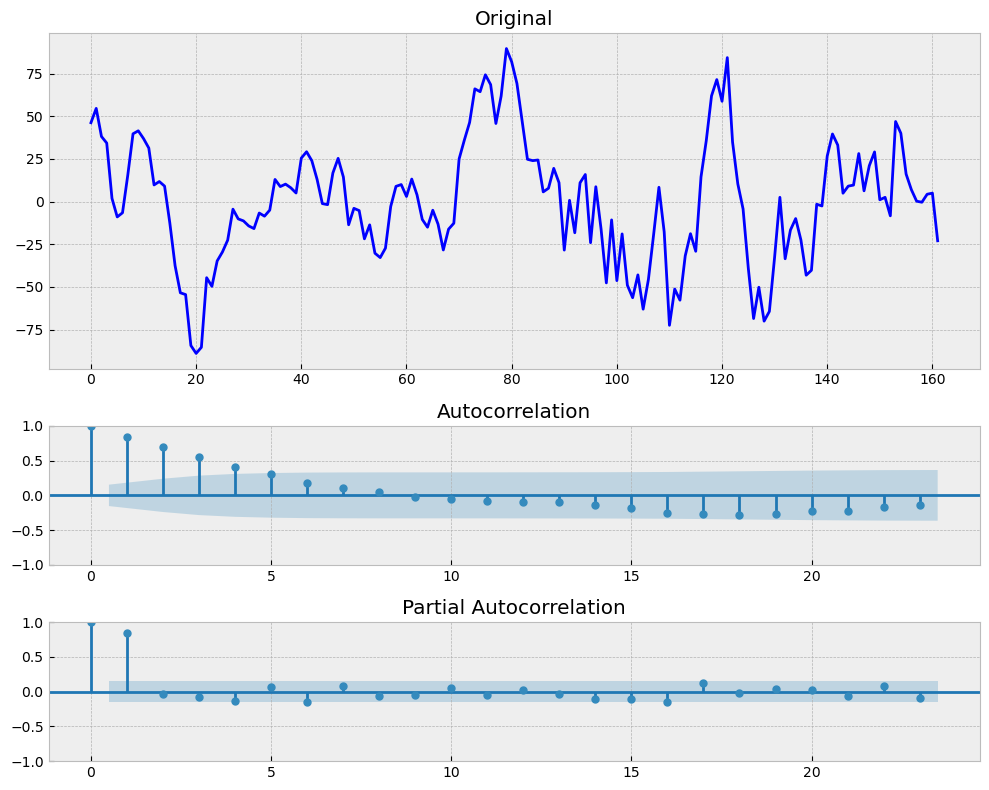

In [16]:
# Полиномиальная регрессия (степень = 2)
degree = 2
X = np.arange(len(series)).reshape(-1, 1)
y = series.values.reshape(-1, 1)

model = make_pipeline(
    PolynomialFeatures(degree),
    LinearRegression()
).fit(X, y)

trend_poly = model.predict(X)

# Вычитаем тренд
detrended_poly = pd.Series(
    (y - trend_poly).flatten(),
    index=series.index,
    name="Detrended (Poly)"
)

# Визуализация
plt.figure(figsize=(10, 5))
plt.plot(series, label="Original")
plt.plot(series.index, trend_poly, label=f"Polynomial Trend (deg={degree})", linestyle="--")
plt.plot(detrended_poly, label="Detrended")
plt.legend()
plt.title("Удаление тренда через полиномиальную регрессию")
plt.show()

test_stationarity(detrended_poly)
tsplot(detrended_poly)

## 6.daily-total-female-births-in-cal.csv

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
Ряд стационарен!


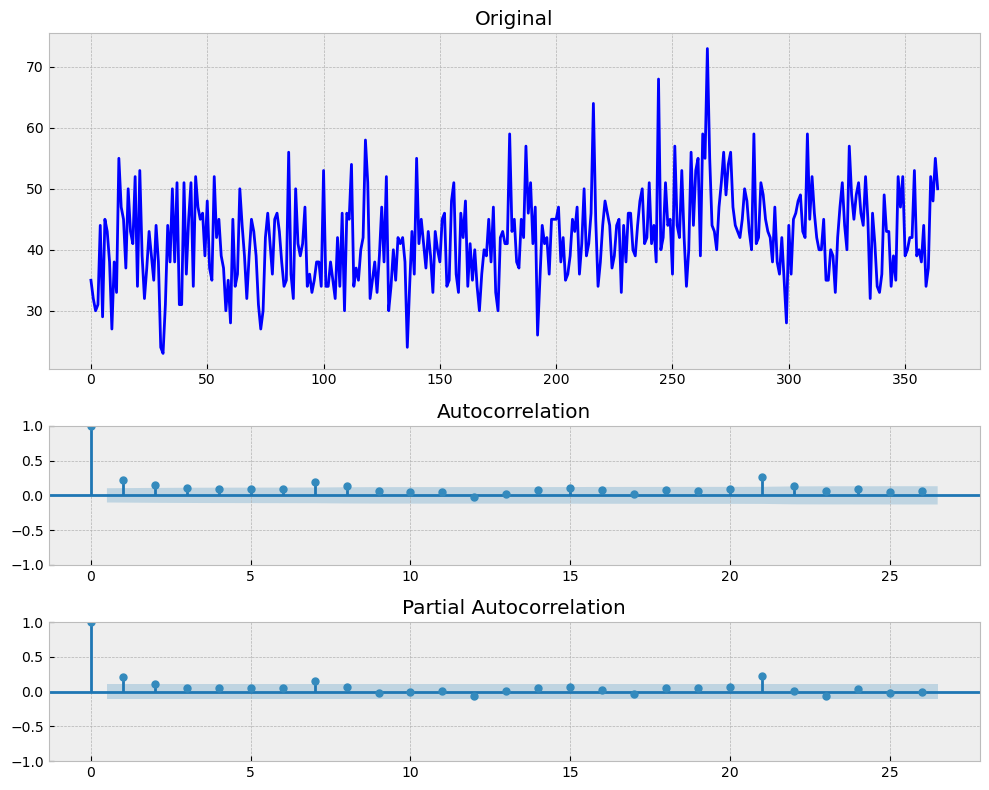

In [17]:
df = pd.read_csv("Series/daily-total-female-births-in-cal.csv")
series = df['Count']
test_stationarity(series)
tsplot(series)